<h1><b>Оценка количества одновременных соединений с документами.</b><h1>

<div class="alert alert-info">
<b> Подготовка данных</b>    
</div>

In [346]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats as st
import seaborn as sns
from itertools import combinations

In [347]:
data = pd.read_csv('C:/Users/gatsko.veronika/Desktop/bitrix_test/task_data_csv.csv')
data['start_edit_time'] = pd.to_datetime(data['start_edit_time']) 
data['conn_end_time'] = pd.to_datetime(data['conn_end_time']) 
data['day_start'] = data['start_edit_time'].dt.date
data['day_start'] = pd.to_datetime(data['day_start']) 
data['hour_start'] = data['start_edit_time'].dt.floor('H')
data['hour_start'] = pd.to_datetime(data['hour_start']) 
data['start_edit_time'].dt.date.value_counts()

2022-12-05    53041
2022-12-06    50362
2022-12-04       81
Name: start_edit_time, dtype: int64

За 2022-12-07 данных для оценки недостаточно.<br>
Будем работать с данными за 2022-12-06 и 2022-12-05


In [348]:
day_1 = data[data['day_start'] == "2022-12-05"]
day_2 = data[data['day_start'] == "2022-12-06"]
day_3 = data[data['day_start'] == "2022-12-04"]
print(len(day_1))
print(len(day_2))
print(len(day_3))

53041
50362
81


<div class="alert alert-info">
<b>Анализ данных</b>    
</div>

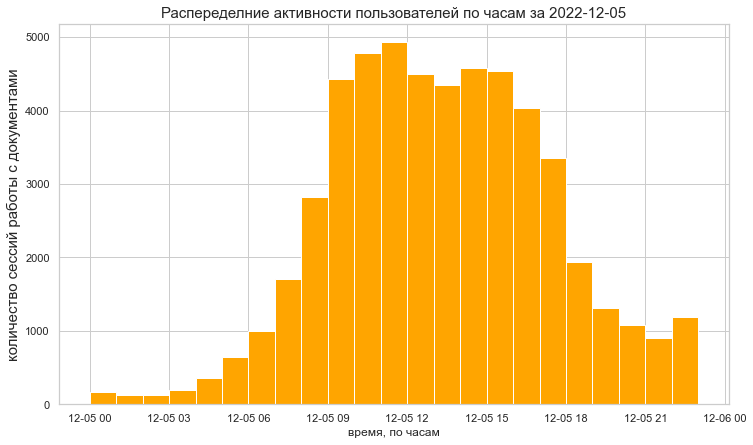

In [287]:
day_1['start_edit_time'].dt.floor('H').hist(bins=23, figsize=(12, 7),  color='orange'); 
plt.title("Распеределние активности пользователей по часам за 2022-12-05", fontsize=15);

plt.ylabel('количество сессий работы с документами', fontsize=15);
plt.xlabel('время, по часам', fontsize=12);

На гистограмме видно, что наибольшая активность пользователей, была с 9 до 17 часов. <br>
Самая высокая нагрузка наблюдается в 11 утра - 4936 сессий. <br>
 <br>
Данная гистограмма отображает пользовательские сессии, пользователи могли работать как с одним документом, так и с несколькими. <br>
Для оценки количества одновременных соединений с документами, возьмем промежуток с самой высокой активностью пользователей - с 11 до 12 утра. 

Пользователи за час (с 11.00 до 12.00) работали с 4106 различными документами.
Чаще всего пользователь работал с документом в одиночку. 
На диграмме ниже показаны случаи, когда с документом одновременно работали несколько пользователей


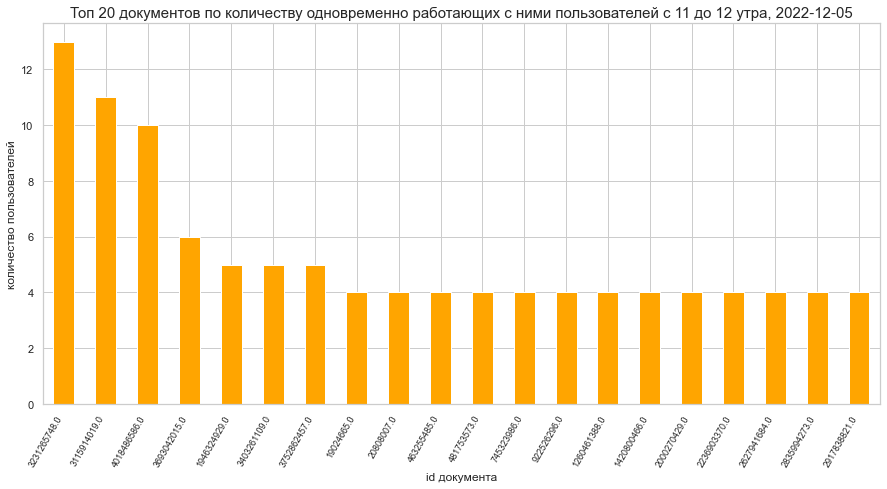

Видим, что максимальное количество одновременно работающих с документом пользователей в самый нагруженный промежуток дня составляет 13 пользователей


In [276]:
filtered_day = day_1.loc[(day_1['start_edit_time'] >= "2022-12-05 11:00:00") & 
                           (day_1['start_edit_time'] <= "2022-12-05 11:59:00")]

print('Пользователи за час (с 11.00 до 12.00) работали с 4106 различными документами.')
print('Чаще всего пользователь работал с документом в одиночку. ')
print('На диграмме ниже показаны случаи, когда с документом одновременно работали несколько пользователей')
      
top_20_doc_id_day_1 = filtered_day.groupby(['doc_id']).count()['user'].nlargest(20)
top_20_doc_id_day_1.plot(kind='bar', figsize=(15, 7), color='orange')

plt.ylabel('количество пользователей', fontsize=12)
plt.xlabel('id документа', fontsize=12)

plt.title('Топ 20 документов по количеству одновременно работающих с ними пользователей с 11 до 12 утра, 2022-12-05', fontsize=15)

plt.xticks(rotation=60, horizontalalignment='right', fontsize=9)
plt.show()
print('Видим, что максимальное количество одновременно работающих с документом пользователей в самый нагруженный промежуток дня составляет 13 пользователей')

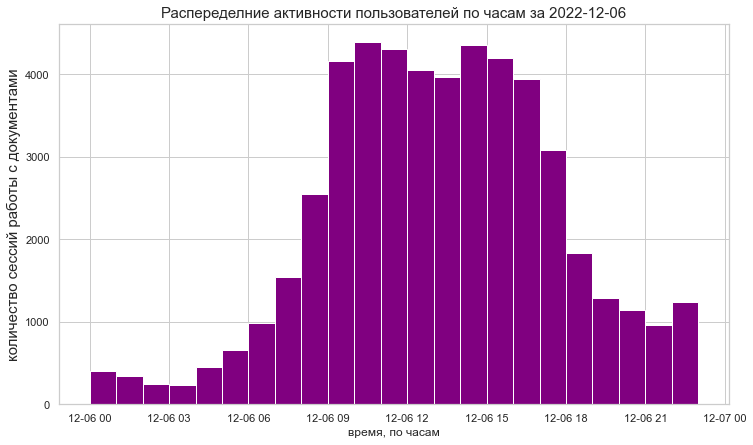

In [260]:
day_2['start_edit_time'].dt.floor('H').hist(bins=23, figsize=(12, 7) , color='purple'); 
plt.title("Распеределние активности пользователей по часам за 2022-12-06", fontsize=15);

plt.ylabel('количество сессий работы с документами', fontsize=15);
plt.xlabel('время, по часам', fontsize=12);

На гистограмме видно, что наибольшая активность пользователей, была с 9 до 16 часов. <br>
Самая высокая нагрузка наблюдается в 10 утра - 4393 сессии. <br>
 <br>
Данная гистограмма отображает пользовательские сессии, пользователи могли работать как с одним документом, так и с несколькими. <br>
Для оценки количества одновременных соединений с документами, возьмем промежуток с самой высокой активностью пользователей - с 10 до 11 утра. 

Пользователи за час (с 10.00 до 11.00) работали с 4080 различными документами.
Чаще всего пользователь работал с документом в одиночку. 
На диграмме ниже показаны случаи, когда с документом одновременно работали несколько пользователей


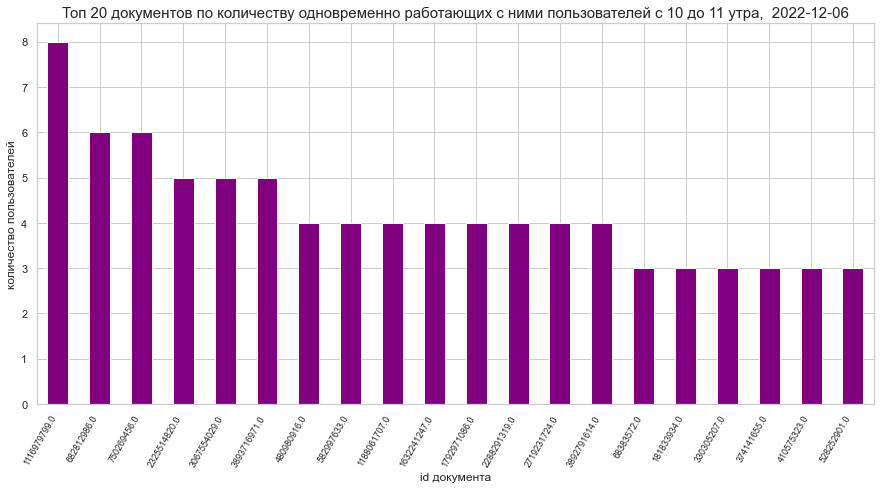

Видим, что максимальное количество одновременно работающих с документом пользователей в самый нагруженный промежуток дня составляет 8 пользователей


In [275]:
filtered_day_2 = day_2.loc[(day_2['start_edit_time'] >= "2022-12-06 10:00:00") & 
                           (day_2['start_edit_time'] <= "2022-12-06 10:59:00")]

print('Пользователи за час (с 10.00 до 11.00) работали с 4080 различными документами.')
print('Чаще всего пользователь работал с документом в одиночку. ')
print('На диграмме ниже показаны случаи, когда с документом одновременно работали несколько пользователей')
      
top_20_doc_id_day_2 = filtered_day_2.groupby(['doc_id']).count()['user'].nlargest(20)
top_20_doc_id_day_2.plot(kind='bar', figsize=(15, 7), color='purple')

plt.ylabel('количество пользователей', fontsize=12)
plt.xlabel('id документа', fontsize=12)

plt.title('Топ 20 документов по количеству одновременно работающих с ними пользователей с 10 до 11 утра,  2022-12-06', fontsize=15)

plt.xticks(rotation=60, horizontalalignment='right', fontsize=9)
plt.show()
print('Видим, что максимальное количество одновременно работающих с документом пользователей в самый нагруженный промежуток дня составляет 8 пользователей')

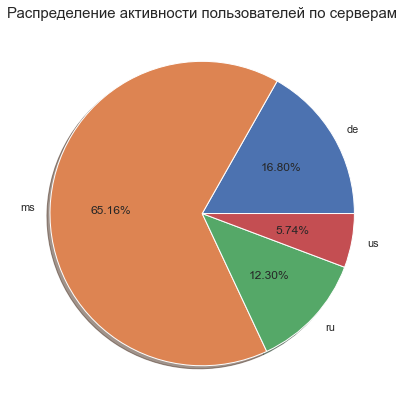

In [351]:
index_doc_day_1 = top_20_doc_id_day_1.index
result_server = day_1[day_1['doc_id'].isin(index_doc_day_1)]
result_server.groupby(['server']).count()['user'].plot(kind='pie', figsize=(15, 7), autopct='%1.2f%%', shadow=True);
plt.title("Распределение активности пользователей по серверам", fontsize=15);
plt.axis('off');

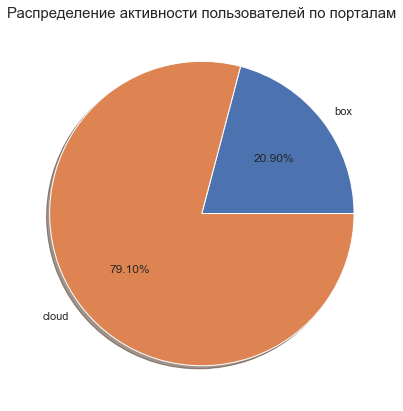

In [350]:
result_portal_type = day_1[day_1['doc_id'].isin(index_doc_day_1)]
result_server.groupby(['portal_type']).count()['user'].plot(kind='pie', figsize=(15, 7), autopct='%1.2f%%', shadow=True);
plt.title("Распределение активности пользователей по порталам", fontsize=15);
plt.axis('off');

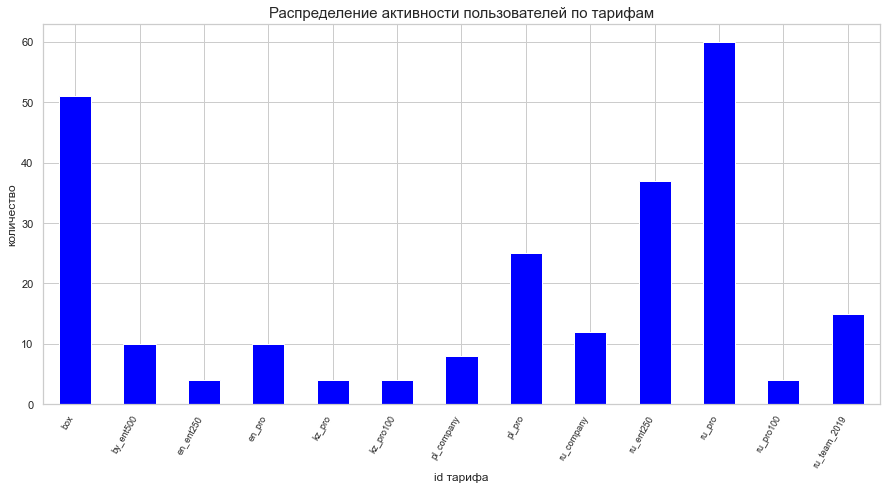

In [349]:
result_portal_type = day_1[day_1['doc_id'].isin(index_doc_day_1)]
result_server.groupby(['tariff_id']).count()['user'].plot(kind='bar', figsize=(15, 7), color = 'blue');
plt.title("Распределение активности пользователей по тарифам", fontsize=15);
plt.xticks(rotation=60, horizontalalignment='right', fontsize=9);

plt.ylabel('количество', fontsize=12);
plt.xlabel('id тарифа', fontsize=12);

<b>Вывод:</b> Исходя из анализа данных о максимальном количестве одновременно работающих с документом пользователей в самые нагруженные промежутки дня, можно сказать, что имеющихся возможностей (не более 3000 одновременных подключений к документу) достаточно для обеспечения текущих потребностей пользователей. Так же имеющихся возможностей будет достаточно если количество одновременно работающих с документом пользователей выростет в 180 раз.
<br><br>
Если появится необходимость уменьшить количество одновременных подключений к документам начать стоит с самых загруженных, на текущий момент это: 
<ul>
<li>сервер  - ms</li>
<li>тип портала -  cloud</li>
<li>тариф - ru_pro</li>
</ul>